<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-Query-and-Python-Predictions-for-Marketing-Campaign" data-toc-modified-id="SQL-Query-and-Python-Predictions-for-Marketing-Campaign-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQL Query and Python Predictions for Marketing Campaign</a></span><ul class="toc-item"><li><span><a href="#Libraries:" data-toc-modified-id="Libraries:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries:</a></span></li><li><span><a href="#Connection-to-local-SQL-server" data-toc-modified-id="Connection-to-local-SQL-server-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Connection to local SQL server</a></span></li><li><span><a href="#Data-summary" data-toc-modified-id="Data-summary-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data summary</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></li><li><span><a href="#Modeling-with-Python-&amp;-Predictions:" data-toc-modified-id="Modeling-with-Python-&amp;-Predictions:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling with Python &amp; Predictions:</a></span><ul class="toc-item"><li><span><a href="#Get-the-data-from-server-/-splitting-data" data-toc-modified-id="Get-the-data-from-server-/-splitting-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get the data from server / splitting data</a></span></li><li><span><a href="#Features-selection:" data-toc-modified-id="Features-selection:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Features selection:</a></span></li><li><span><a href="#Logistic-Regression:" data-toc-modified-id="Logistic-Regression:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic Regression:</a></span></li><li><span><a href="#Light-GBM:" data-toc-modified-id="Light-GBM:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Light GBM:</a></span></li><li><span><a href="#Random-Forest:" data-toc-modified-id="Random-Forest:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random Forest:</a></span></li></ul></li><li><span><a href="#Tableau-Deployment" data-toc-modified-id="Tableau-Deployment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tableau Deployment</a></span><ul class="toc-item"><li><span><a href="#Connection" data-toc-modified-id="Connection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Connection</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-functions" data-toc-modified-id="Logistic-Regression-functions-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Logistic Regression functions</a></span></li><li><span><a href="#Light-GBM-Functions" data-toc-modified-id="Light-GBM-Functions-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Light GBM Functions</a></span></li><li><span><a href="#Random-Forest-Functions" data-toc-modified-id="Random-Forest-Functions-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Random Forest Functions</a></span></li></ul></li><li><span><a href="#Deployment" data-toc-modified-id="Deployment-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Deployment</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Light-GBM" data-toc-modified-id="Light-GBM-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Light GBM</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li></ul></li></ul></div>

# SQL Query and Python Predictions for Marketing Campaign

Data: https://www.kaggle.com/rodsaldanha/arketing-campaign

## Libraries:

In [1]:
import pandas as pd
import pyodbc
import sqlalchemy
from matplotlib import pyplot as plt
import seaborn as sns
import jupyterthemes as jt 
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
import tabpy
from sklearn.feature_selection import RFE 
import tabpy_client

## Connection to local SQL server

In [2]:
ServerName = 'LAPTOP-GRS265IG\PAVOT_SQL'
Database = 'Marketing_Campaign'
Driver = "driver=SQL Server Native Client 11.0"

# Create the engine
engine = sqlalchemy.create_engine('mssql+pyodbc://' + ServerName + '/' + Database + "?" + Driver)

Assign the dataset:

In [3]:
# query database
sql = """

SELECT *
FROM market

"""
# Assign the data into a dataframe
market = pd.io.sql.read_sql(sql, engine)
market.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Data summary

Check the column type of the dataframe:

In [4]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Check for missing values:

In [8]:
for i in market.columns:
    if market[i].isna().sum() > 0:
        print(i)

Income


## Data Cleaning

First, create a second table where we perform the transformation:

In [9]:
market.to_sql("market_clean", engine, if_exists="replace")

In [10]:
sql = """

SELECT *
FROM market_clean

"""
# Assign the data into a dataframe
market = pd.io.sql.read_sql(sql, engine)
market.head()

level_0  index     ID  Year_Birth   Education Marital_Status   Income  \
0      240    488   3436        1969  Graduation        Married  14045.0   
1      241    489   3921        1952    2n Cycle          Widow  28457.0   
2      242    490   3403        1958         PhD       Together  78952.0   
3      243    491     22        1976  Graduation       Divorced  46310.0   
4      244    492  10965        1955  Graduation       Together  76005.0   

   Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth  AcceptedCmp3  \
0        1         0  2014-01-26  ...                  7             0   
1        0         0  2012-10-28  ...                  8             0   
2        0         1  2012-09-24  ...                  6             0   
3        1         0  2012-12-03  ...                  8             0   
4        0         0  2013-02-22  ...                  6             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             1             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 31 columns]

Fill misssing values with the mean:

In [11]:
sql = """

UPDATE market_clean
SET Income = (SELECT AVG(Income) FROM market_clean)
WHERE Income IS NULL

"""

pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

We now check if there's still missing values:

In [12]:
sql = """

SELECT Income
from market_clean
WHERE Income IS NULL
"""

pd.io.sql.read_sql(sql, engine)

Empty DataFrame
Columns: [Income]
Index: []

As we can see, they were perefectly replaced.

Now, we will focus on the string object:

In [13]:
sql = """
SELECT COUNT(DISTINCT(Education)) as Edu, COUNT(DISTINCT(Marital_Status)) as Marital, COUNT(DISTINCT(Dt_Customer)) as Dt
FROM market_clean
"""
pd.io.sql.read_sql(sql, engine)

Edu  Marital   Dt
0    5        8  663

Focus on Dt_Customer:

We know transform DT Customer column into quarter and years variables variables:

In [14]:
sql =  """

ALTER TABLE market_clean
    ADD Q1 smallint,
        Q2 smallint,
        Q3 smallint,
        Q4 smallint,
        Year_2012 smallint,
        Year_2013 smallint,
        Year_2014 smallint

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [15]:
sql = """

UPDATE market_clean SET
Q1 = (CASE 
        WHEN datepart(month,Dt_Customer) <= 3 THEN 1
            ELSE 0
            END),

Q2 = (CASE 
        WHEN datepart(month,Dt_Customer) >3 AND datepart(month,Dt_Customer) <= 6 THEN 1
            ELSE 0
            END),

Q3 = (CASE 
        WHEN datepart(month,Dt_Customer) >6 AND datepart(month,Dt_Customer) <= 9 THEN 1
            ELSE 0
            END),

Q4 = (CASE 
        WHEN datepart(month,Dt_Customer) > 9 THEN 1
            ELSE 0
            END),

Year_2012 = (CASE 
        WHEN datepart(year, Dt_Customer) = 2012 THEN 1
            ELSE 0
            END),

Year_2013 = (CASE 
        WHEN datepart(year,Dt_Customer) = 2013 THEN 1
            ELSE 0
            END),

Year_2014 = (CASE
        WHEN datepart(year, Dt_Customer) = 2014 THEN 1
        ELSE 0
        END)
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [16]:
sql =  """

ALTER TABLE market_clean
DROP COLUMN Dt_Customer

"""

pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [17]:
sql =  """

SELECT COLUMN_NAME, DATA_TYPE 
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE TABLE_NAME = 'market_clean'
"""

pd.io.sql.read_sql(sql, engine)

COLUMN_NAME DATA_TYPE
0               level_0    bigint
1                 index    bigint
2                    ID    bigint
3            Year_Birth    bigint
4             Education   varchar
5        Marital_Status   varchar
6                Income     float
7               Kidhome    bigint
8              Teenhome    bigint
9               Recency    bigint
10             MntWines    bigint
11            MntFruits    bigint
12      MntMeatProducts    bigint
13      MntFishProducts    bigint
14     MntSweetProducts    bigint
15         MntGoldProds    bigint
16    NumDealsPurchases    bigint
17      NumWebPurchases    bigint
18  NumCatalogPurchases    bigint
19    NumStorePurchases    bigint
20    NumWebVisitsMonth    bigint
21         AcceptedCmp3    bigint
22         AcceptedCmp4    bigint
23         AcceptedCmp5    bigint
24         AcceptedCmp1    bigint
25         AcceptedCmp2    bigint
26             Complain    bigint
27        Z_CostContact    bigint
28            Z_Revenue    bigint
29             Response    bigint
30                   Q1  smallint
31                   Q2  smallint
32                   Q3  smallint
33                   Q4  smallint
34            Year_2012  smallint
35            Year_2013  smallint
36            Year_2014  smallint

Focus on Education:

We will now dummy encode the 5 differents categories of Education using SQL:

We first check all the distinct values of education:

In [18]:
sql = """
SELECT DISTINCT(Education)
FROM market_clean

"""
pd.io.sql.read_sql(sql, engine)

Education
0  Graduation
1         PhD
2      Master
3    2n Cycle
4       Basic

We now create the new columns that we are going to populate later:

In [19]:
sql =  """

ALTER TABLE market_clean
    ADD Edu_Graduation smallint,
        Edu_PhD smallint,
        Edu_Master smallint,
        Edu_2ndCycle smallint,
        Edu_Basic smallint

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

We now populate them by one when it's true and 0 when false using CASE WHEN:

In [20]:
sql = """

UPDATE market_clean SET
Edu_Graduation = (CASE WHEN Education = 'Graduation' THEN 1
    ELSE 0
    END),
    
Edu_PhD = (CASE WHEN Education = 'PhD' THEN 1
    ELSE 0
    END),
    
Edu_Master = (CASE WHEN Education = 'Master' THEN 1
    ELSE 0
    END),
    
Edu_2ndCycle = (CASE WHEN Education = '2n Cycle' THEN 1
    ELSE 0
    END),
    
Edu_Basic = (CASE WHEN Education = 'Basic' THEN 1
    ELSE 0
    END)

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

To make sure that it worked well, we have to check that the sum of each column created isn't equal to zero. In this case, it would means that we created a column that is fully consitituted of 0 meaning that no values are true in this column.

In [21]:
sql = """

SELECT SUM(Edu_Graduation) AS gradu, SUM(Edu_PhD) AS PhD, 
       SUM(Edu_Master) AS Master, SUM(Edu_2ndCycle) AS Second, SUM(Edu_Basic) AS Basic
FROM market_clean

"""
pd.io.sql.read_sql(sql, engine)

gradu  PhD  Master  Second  Basic
0   1127  486     370     203     54

And we drop the column:

In [22]:
sql =  """

ALTER TABLE market_clean
DROP COLUMN Education

"""

pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

Focus on Mairtal Status:

Check all distincts values first:

In [23]:
sql = """

SELECT Marital_Status, COUNT((Marital_Status))
FROM market_clean
GROUP BY Marital_Status

"""
pd.io.sql.read_sql(sql, engine)

Marital_Status     
0         Absurd    2
1          Alone    3
2       Divorced  232
3        Married  864
4         Single  480
5       Together  580
6          Widow   77
7           YOLO    2

We can assign Alone to single and create an "Other" categories regrouping "asburd" and "Yolo".

We create the column for dummy encoding:

In [24]:
sql =  """

ALTER TABLE market_clean
    ADD Divorced smallint,
        Married smallint,
        Single smallint,
        Together smallint,
        Widow smallint,
        Other smallint

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [25]:
sql = """

UPDATE market_clean SET
Divorced = (CASE WHEN Marital_Status = 'Divorced' THEN 1
    ELSE 0
    END),
    
Married = (CASE WHEN Marital_Status = 'Married' THEN 1
    ELSE 0
    END),

Single = (CASE WHEN Marital_Status = 'Single' OR Marital_Status = 'Alone' THEN 1
    ELSE 0
    END),
    
Together = (CASE WHEN Marital_Status = 'Together' THEN 1
    ELSE 0
    END),
    
Widow = (CASE WHEN Marital_Status = 'Widow' THEN 1
    ELSE 0
    END),
    
Other = (CASE WHEN Marital_Status NOT IN ('Divorced', 'Married', 'Single', 'Together', 'Widow') THEN 1
    ELSE 0
    END)
    
"""
pd.io.sql.read_sql(sql, engine)
    

ResourceClosedError: This result object does not return rows. It has been closed automatically.

Check with SUM:

In [26]:
sql = """

SELECT SUM(Divorced) AS Divorced, SUM(Married) AS Married, SUM(Together) AS Together, 
       SUM(Single) AS Single, SUM(Widow) AS Widow, SUM(Other) AS Other
FROM market_clean
"""
pd.io.sql.read_sql(sql, engine)

Divorced  Married  Together  Single  Widow  Other
0       232      864       580     483     77      7

And finally drop the original Marital Status column:

In [27]:
sql =  """

ALTER TABLE market_clean
DROP COLUMN Marital_Status

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

We check all column are numerical:

In [28]:
sql =  """

SELECT COLUMN_NAME, DATA_TYPE 
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE TABLE_NAME = 'market_clean'
"""

pd.io.sql.read_sql(sql, engine)

COLUMN_NAME DATA_TYPE
0               level_0    bigint
1                 index    bigint
2                    ID    bigint
3            Year_Birth    bigint
4                Income     float
5               Kidhome    bigint
6              Teenhome    bigint
7               Recency    bigint
8              MntWines    bigint
9             MntFruits    bigint
10      MntMeatProducts    bigint
11      MntFishProducts    bigint
12     MntSweetProducts    bigint
13         MntGoldProds    bigint
14    NumDealsPurchases    bigint
15      NumWebPurchases    bigint
16  NumCatalogPurchases    bigint
17    NumStorePurchases    bigint
18    NumWebVisitsMonth    bigint
19         AcceptedCmp3    bigint
20         AcceptedCmp4    bigint
21         AcceptedCmp5    bigint
22         AcceptedCmp1    bigint
23         AcceptedCmp2    bigint
24             Complain    bigint
25        Z_CostContact    bigint
26            Z_Revenue    bigint
27             Response    bigint
28                   Q1  smallint
29                   Q2  smallint
30                   Q3  smallint
31                   Q4  smallint
32            Year_2012  smallint
33            Year_2013  smallint
34            Year_2014  smallint
35       Edu_Graduation  smallint
36              Edu_PhD  smallint
37           Edu_Master  smallint
38         Edu_2ndCycle  smallint
39            Edu_Basic  smallint
40             Divorced  smallint
41              Married  smallint
42               Single  smallint
43             Together  smallint
44                Widow  smallint
45                Other  smallint

New columns:

* Age
* RFM
* Income using number of stakeholders involved in the household
* Total spent

Compute Age:

In [29]:
sql = """

ALTER TABLE market_clean
    ADD Age int
    
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [56]:
sql =  """

UPDATE market_clean SET
Age = DATEPART(year, GETDATE()) - Year_Birth
"""

pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

Compute RFM:

Recency:

In [30]:
sql = """
ALTER TABLE market_clean
    ADD R smallint
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [31]:
sql = """

WITH Recency AS
    (SELECT  TOP 1 PERCENTILE_DISC(0.2) WITHIN GROUP (ORDER BY Recency) OVER() AS One,
        PERCENTILE_DISC(0.4) WITHIN GROUP (ORDER BY Recency) OVER() AS Two,
        PERCENTILE_DISC(0.6) WITHIN GROUP (ORDER BY Recency) OVER() AS Three,
        PERCENTILE_DISC(0.8) WITHIN GROUP (ORDER BY Recency) OVER() AS Four
    FROM market_clean)
    
UPDATE market_clean SET
R = (CASE 
        WHEN Recency <= (SELECT One FROM Recency) THEN 5
        WHEN Recency >= (SELECT One FROM Recency) AND Recency < (SELECT Two FROM Recency) THEN 4
        WHEN Recency >= (SELECT Two FROM Recency) AND Recency < (SELECT Three FROM Recency) THEN 3
        WHEN Recency >= (SELECT Three FROM Recency) AND Recency < (SELECT Four FROM Recency) THEN 2
        ELSE 1 END)

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [46]:
sql = """

SELECT COUNT(R)
FROM market_clean
GROUP BY R

"""
pd.io.sql.read_sql(sql, engine)

0  455
1  464
2  431
3  456
4  434

Frequency:

We will base our Frequency as the sum of the number of purchases made on Internet and in Stores:

In [33]:
sql = """
ALTER TABLE market_clean
    ADD F smallint,
    NbPurchases int
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [48]:
sql  = """
UPDATE market_clean
SET NbPurchases = NumStorePurchases + NumWebPurchases
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [34]:
sql  = """

WITH Frequency AS(
    SELECT  TOP 1 PERCENTILE_DISC(0.2) WITHIN GROUP (ORDER BY NbPurchases) OVER() AS One,
        PERCENTILE_DISC(0.4) WITHIN GROUP (ORDER BY NbPurchases) OVER() AS Two,
        PERCENTILE_DISC(0.6) WITHIN GROUP (ORDER BY NbPurchases) OVER() AS Three,
        PERCENTILE_DISC(0.8) WITHIN GROUP (ORDER BY NbPurchases) OVER() AS Four
    FROM market_clean)
    

UPDATE market_clean SET
F = (CASE 
        WHEN NbPurchases <= (SELECT One FROM Frequency) THEN 1
        WHEN NbPurchases >= (SELECT One FROM Frequency) AND NbPurchases < (SELECT Two FROM Frequency) THEN 2
        WHEN NbPurchases >= (SELECT Two FROM Frequency) AND NbPurchases < (SELECT Three FROM Frequency) THEN 3
        WHEN NbPurchases >= (SELECT Three FROM Frequency) AND NbPurchases < (SELECT Four FROM Frequency) THEN 4
        ELSE 5 END)

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [49]:
sql = """

SELECT COUNT(F)
FROM market_clean
GROUP BY F

"""
pd.io.sql.read_sql(sql, engine)

0  432
1  635
2  486
3  500
4  187

Monetary:

For the monetary aspect, we will take this as the sum of money spent in all different products types. Such as for the frequency, we won't delete the column created before as it can be usefull as a column which aggregate information and could lead to better prediction for the model.

In [51]:
sql = """
ALTER TABLE market_clean
    ADD M smallint,
    AmountSpent int
"""
pd.io.sql.read_sql(sql, engine)

ProgrammingError: (pyodbc.ProgrammingError) ('42S21', "[42S21] [Microsoft][SQL Server Native Client 11.0][SQL Server]Dans une même table, les noms de colonnes doivent être uniques. Le nom de colonne 'M' de la table 'market_clean' est spécifié plusieurs fois. (2705) (SQLExecDirectW)")
[SQL: 
ALTER TABLE market_clean
    ADD M smallint,
    AmountSpent int
]
(Background on this error at: http://sqlalche.me/e/f405)

In [52]:
sql  = """
UPDATE market_clean
SET AmountSpent = MntFishProducts  + MntMeatProducts + MntFruits + MntSweetProducts + MntWines 
+ MntGoldProds 
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [37]:
sql  = """

WITH Monetary AS(
    SELECT  TOP 1 PERCENTILE_DISC(0.2) WITHIN GROUP (ORDER BY AmountSpent) OVER() AS One,
        PERCENTILE_DISC(0.4) WITHIN GROUP (ORDER BY AmountSpent) OVER() AS Two,
        PERCENTILE_DISC(0.6) WITHIN GROUP (ORDER BY AmountSpent) OVER() AS Three,
        PERCENTILE_DISC(0.8) WITHIN GROUP (ORDER BY AmountSpent) OVER() AS Four
    FROM market_clean)
    

UPDATE market_clean SET
M = (CASE 
        WHEN AmountSpent <= (SELECT One FROM Monetary) THEN 1
        WHEN AmountSpent >= (SELECT One FROM Monetary) AND AmountSpent < (SELECT Two FROM Monetary) THEN 2
        WHEN AmountSpent >= (SELECT Two FROM Monetary) AND AmountSpent < (SELECT Three FROM Monetary) THEN 3
        WHEN AmountSpent >= (SELECT Three FROM Monetary) AND AmountSpent < (SELECT Four FROM Monetary) THEN 4
        ELSE 5 END)

"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [53]:
sql = """

SELECT COUNT(M)
FROM market_clean
GROUP BY M

"""
pd.io.sql.read_sql(sql, engine)

0  448
1  452
2  448
3  449
4  443

RFM:

In [54]:
sql = """
ALTER TABLE market_clean
    ADD RFM int
"""
pd.io.sql.read_sql(sql, engine)

ProgrammingError: (pyodbc.ProgrammingError) ('42S21', "[42S21] [Microsoft][SQL Server Native Client 11.0][SQL Server]Dans une même table, les noms de colonnes doivent être uniques. Le nom de colonne 'RFM' de la table 'market_clean' est spécifié plusieurs fois. (2705) (SQLExecDirectW)")
[SQL: 
ALTER TABLE market_clean
    ADD RFM int
]
(Background on this error at: http://sqlalche.me/e/f405)

In [55]:
sql = """
    UPDATE market_clean
    SET RFM = CAST(CONCAT(R,F,M) AS int)
    FROM market_clean
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [41]:
sql = """
    SELECT RFM, COUNT(RFM) AS Count
    FROM market_clean
    GROUP BY RFM
    ORDER BY Count Desc
"""
pd.io.sql.read_sql(sql, engine)

RFM  Count
0    0   2240

Income using number of stakeholders involved in the household

For the customers that are married, we are going to use the Income column as it represents the total income in the houseold and we will divide it by 2 as there is two people involved.

In [42]:
sql = """
ALTER TABLE market_clean
    ADD IncomePerPeople int
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [44]:
sql = """

UPDATE market_clean
SET IncomePerPeople = CASE
        WHEN Married = 1 THEN Income / 2 
        ELSE Income
        END 
"""
pd.io.sql.read_sql(sql, engine)

ResourceClosedError: This result object does not return rows. It has been closed automatically.

In [45]:
sql = """

SELECT MAX(IncomePerPeople), MIN(IncomePerPeople), AVG(IncomePerPeople)
FROM market_clean
"""
pd.io.sql.read_sql(sql, engine)

0  666666  1223  42270

# Modeling with Python & Predictions:

## Get the data from server / splitting data

In [4]:
sql = """

SELECT * 
FROM market_clean

"""
market = pd.io.sql.read_sql(sql, engine)
market.head()

level_0  index     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  \
0      240    488   3436        1969  14045.0        1         0       24   
1      241    489   3921        1952  28457.0        0         0       96   
2      242    490   3403        1958  78952.0        0         1       11   
3      243    491     22        1976  46310.0        1         0       99   
4      244    492  10965        1955  76005.0        0         0       72   

   MntWines  MntFruits  ...  Widow  Other  Age  R  F  NbPurchases  M  \
0        11          0  ...      0      0   51  4  1            4  1   
1        24          1  ...      1      0   68  1  3            8  3   
2      1170         19  ...      0      0   62  5  4           14  5   
3       185          2  ...      0      0   44  1  4           11  3   
4       983         20  ...      0      0   65  2  5           16  5   

   AmountSpent  RFM  IncomePerPeople  
0           20  411             7022  
1          205  133            28457  
2         2092  545            78952  
3          309  143            46310  
4         1722  255            76005  

[5 rows x 54 columns]

In [5]:
market = market.drop(['level_0', 'index'], axis = 1)

Now that we have our data, the first step is to create a train / test set:

In [6]:
#Separating the features from the target for random forest fitting
target = "Response"
selected = market.drop(columns=["Response","ID"])
selected = selected.columns.values
X_train, X_test, y_train, y_test = train_test_split(market[selected], market[target], test_size=0.3,
                                                    random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(1568, 50)
(672, 50)


## Features selection:

In [8]:
#Initiate a classifier
lgb = lightgbm.LGBMClassifier(random_state=0)
#Speicify it
lgb_selector = RFE(estimator=lgb, n_features_to_select=20, step=3, verbose=5)
#Fit it
lgb_selector.fit(X_train, y_train)
#Extract the support
lgb_support = lgb_selector.get_support()
#Get the data name
lgb_feature = X_train.loc[:, lgb_support].columns.tolist()

print(str(len(lgb_feature)), 'selected features')

print(lgb_feature)
#Assign the selected data to a dataframe
modeldata = market.loc[:, lgb_feature]
modeldata['Response'] = market['Response']
modeldata['ID'] = market['ID']

Fitting estimator with 50 features.
Fitting estimator with 47 features.
Fitting estimator with 44 features.
Fitting estimator with 41 features.
Fitting estimator with 38 features.
Fitting estimator with 35 features.
Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
20 selected features
['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Year_2012', 'Age', 'NbPurchases', 'AmountSpent', 'RFM', 'IncomePerPeople']


In [9]:
#Separating the features from the target for random forest fitting
target = "Response"
selected = modeldata.drop(columns=["Response","ID"])
selected = selected.columns.values
X_train, X_test, y_train, y_test = train_test_split(market[selected], market[target], test_size=0.3,
                                                    random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)

(1568, 20)
(672, 20)


## Logistic Regression:

With cross validation approach:

In [54]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [55]:
crossval_scores = cross_val_score(logreg, market[selected], market[target], scoring='roc_auc', cv=10)
crossval_scores.mean()

0.7655141453109213

In [56]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients.columns = ['Feature','Coef']
coefficients.sort_values(by ="Coef", ascending = False)

Feature      Coef
18                  RFM  0.003955
5       MntMeatProducts  0.001448
3              MntWines  0.001307
8          MntGoldProds  0.000869
17          AmountSpent  0.000670
13    NumWebVisitsMonth  0.000177
10      NumWebPurchases  0.000072
14            Year_2012  0.000052
7      MntSweetProducts  0.000043
9     NumDealsPurchases  0.000041
11  NumCatalogPurchases  0.000037
19      IncomePerPeople  0.000021
1                Income -0.000039
16          NbPurchases -0.000225
12    NumStorePurchases -0.000297
15                  Age -0.000419
4             MntFruits -0.000662
2               Recency -0.001235
0            Year_Birth -0.001574
6       MntFishProducts -0.002335

With Test set and ROC AUC Curve:

In [57]:
logreg = LogisticRegression( max_iter=1000, random_state=0).fit(X_train, y_train)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.752


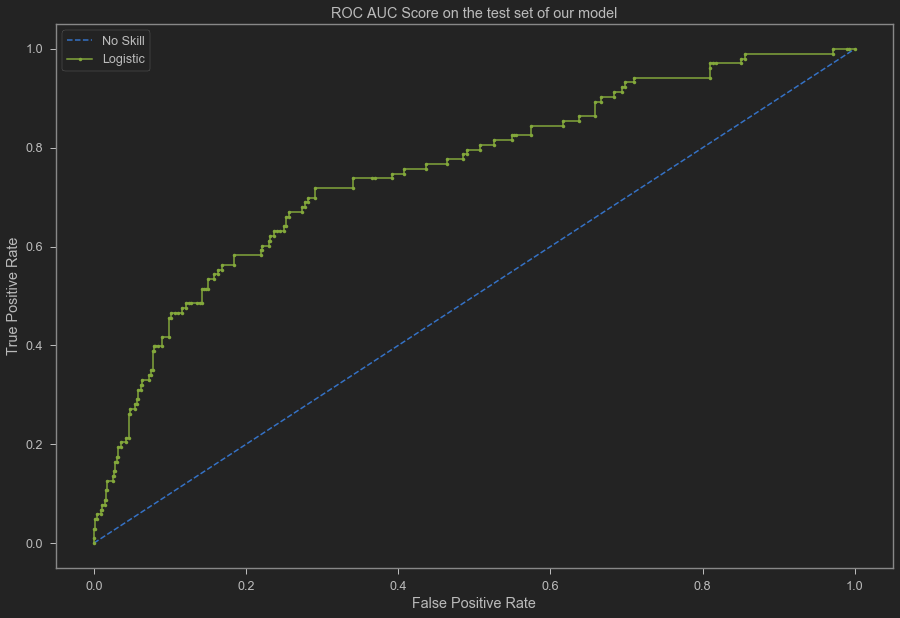

In [58]:
ns_probs = [0 for _ in range(len(y_test))]
proba = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

## Light GBM:

This time, we first use cross validation approach to find the best parameters for our LGM: 

In [59]:
bestparamsLGB = {"max_bin" : [20,30, 40], "learning_rate" : [0.05], "num_iterations" : [500,750, 1000], \
             "num_leaves": [6,8, 10], "bagging_fraction" : [0,5, 0,7, 0.9], "feature_fraction": [0.35], "min_data_in_leaf" : [25], \
             "min_sum_hessian_in_leaf" : [10,25, 40], "max_depth" : [5,7,9]}

In [60]:
clf = GridSearchCV(lightgbm.LGBMClassifier(), param_grid = bestparamsLGB, n_jobs=-1, scoring = 'roc_auc',cv=3, verbose = 2)
clf.fit(X=X_train, y=y_train)
LGBModel = clf.best_estimator_

Fitting 3 folds for each of 1215 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 3221 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  1.3min finished


In [61]:
clf.best_estimator_

LGBMClassifier(bagging_fraction=0.9, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.35,
               importance_type='split', learning_rate=0.05, max_bin=30,
               max_depth=5, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=25, min_split_gain=0.0,
               min_sum_hessian_in_leaf=10, n_estimators=100, n_jobs=-1,
               num_iterations=500, num_leaves=6, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

We now compute the cross validation score on the train set fitted with the best parameters:

In [62]:
crossval_scores = cross_val_score(LGBModel, X_train,y_train, scoring='roc_auc', cv=10)
crossval_scores.mean()

0.8577708466493943

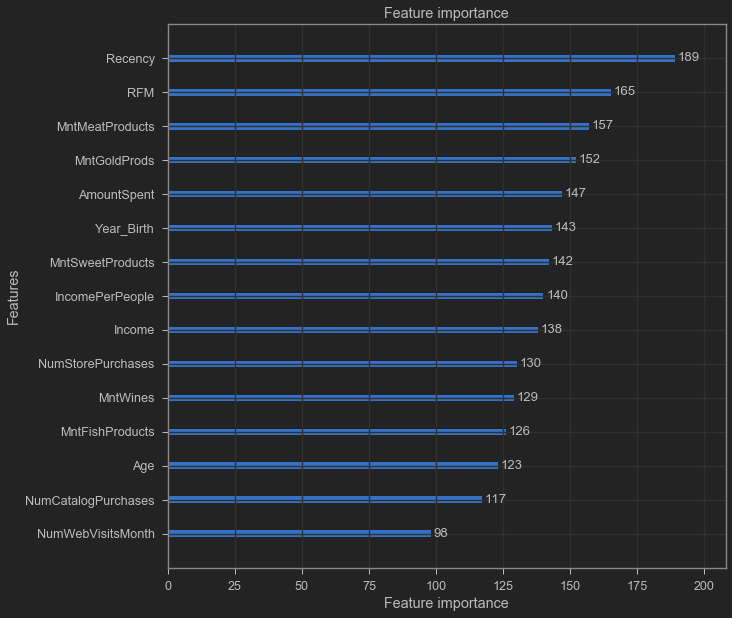

In [63]:
lightgbm.plot_importance(LGBModel, max_num_features = 15, figsize = (10,10))

And we print the score on the test set with the ROC AUC Curve:

No Skill: ROC AUC=0.500
LGBM: ROC AUC=0.828


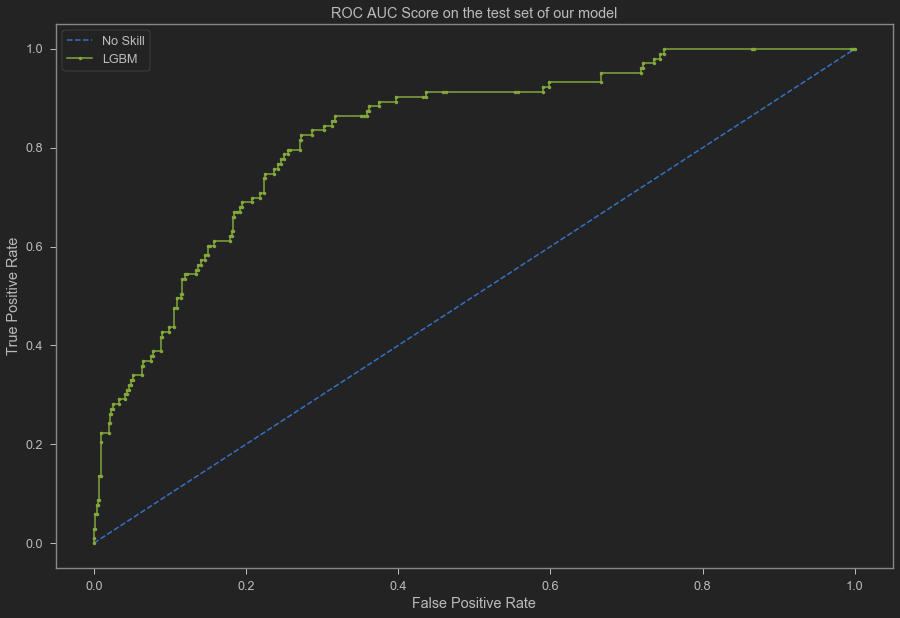

In [64]:
ns_probs = [0 for _ in range(len(y_test))]
proba = LGBModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LGBM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

## Random Forest:

We first initate range of parameters for our gridsearch:

In [65]:
bestparamsRF = {'n_estimators': [1500],
               'max_features': ['sqrt'],
               'max_depth': [14],
               'min_samples_split': [2],
               'min_samples_leaf': [2],
               'bootstrap': [True]}

In [66]:
clf = GridSearchCV(RandomForestClassifier(), param_grid = bestparamsRF, n_jobs=-1, scoring = 'roc_auc',cv=3, verbose = 2)
clf.fit(X=X_train, y=y_train)
rf_model = clf.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.9s finished


In [67]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
crossval_scores = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc', cv=10)
crossval_scores.mean()

0.862968766009768

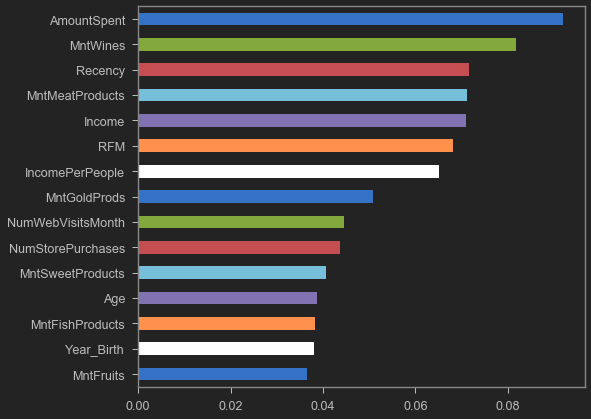

In [69]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(axis = 0, ascending = False)
ax = feat_importances.nlargest(15).plot(kind='barh', color=['b', 'g', 'r', 'c', 'm', 'y', 'w'])
ax.invert_yaxis()

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.850


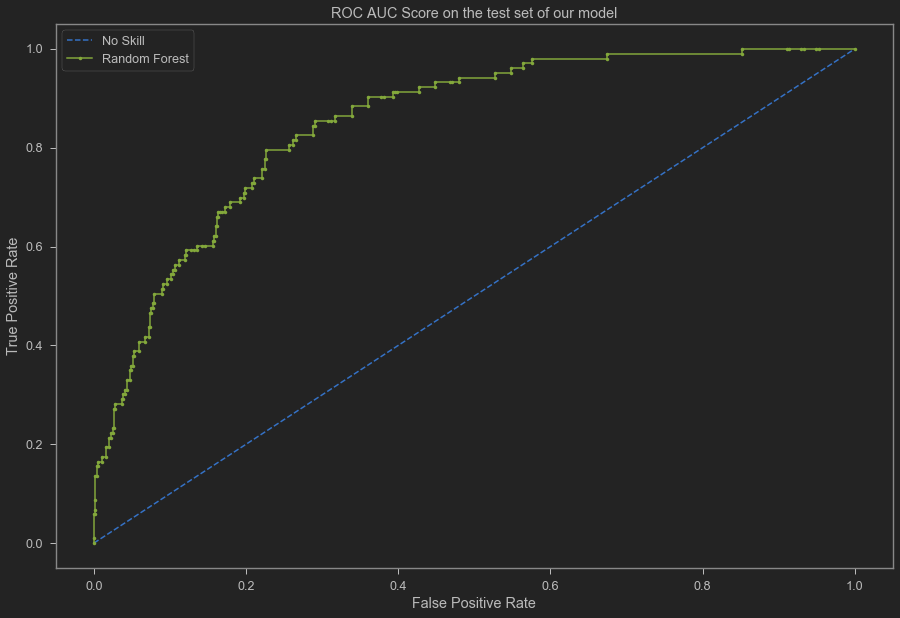

In [70]:
ns_probs = [0 for _ in range(len(y_test))]
proba = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = proba[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
f, axes = plt.subplots(figsize=(15, 10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('ROC AUC Score on the test set of our model')
plt.show()

# Tableau Deployment

## Connection

In [71]:
# Connect to TabPy server using the client library
connection = tabpy_client.Client('http://localhost:9004/')

## Functions

### Logistic Regression functions

In [72]:
# The scoring function that will use the Gradient Boosting Classifier to classify new data points
def LogReg_Prediction(Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople):
    X = np.column_stack([Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople])
    
    return logreg.predict(X).tolist()

In [73]:
# The scoring function that will use the Gradient Boosting Classifier to classify new data points
def LogReg_Proba(Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople):
    X = np.column_stack([Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople])
    
    return logreg.predict_proba(X)[0][1].tolist()

### Light GBM Functions

In [74]:
# The scoring function that will use the Gradient Boosting Classifier to classify new data points
def LGBM_Prediction(Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople):
    X = np.column_stack([Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople])
    
    return LGBModel.predict(X).tolist()

In [75]:
# The scoring function that will use the Gradient Boosting Classifier to classify new data points
def LGBM_Proba(Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople):
    X = np.column_stack([Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople])
    
    return LGBModel.predict_proba(X)[0][1].tolist()

### Random Forest Functions

In [76]:
# The scoring function that will use the Gradient Boosting Classifier to classify new data points
def RF_Prediction(Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople):
    X = np.column_stack([Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople])
    
    return rf_model.predict(X).tolist()

In [77]:
# The scoring function that will use the Gradient Boosting Classifier to classify new data points
def RF_Proba(Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople):
    X = np.column_stack([Year_Birth, Income, Recency, 
                     MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
                     MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases,
                     NumStorePurchases, NumWebVisitsMonth, Year_2012, Age, NbPurchases,
                     AmountSpent, RFM, IncomePerPeople])
    
    return rf_model.predict_proba(X)[0][1].tolist()

## Deployment

### Logistic Regression

In [78]:
# Publish the RF_Prediction function to TabPy server so it can be used from Tableau
# Using the name RF_Model and a short description of what it does
connection.deploy('LogReg_Model',
                  LogReg_Prediction,
                  'Returns response prediction based on top 15 features for the marketing dataset',
                 override=True)

In [79]:
# Publish the RF_Proba function to TabPy server so it can be used from Tableau
# Using the name Proba and a short description of what it does
connection.deploy('LogReg_Proba',
                  LogReg_Proba,
                  'Returns probability prediction based on top 15 features for the marketing dataset',
                 override=True)

### Light GBM

In [80]:
# Publish the RF_Prediction function to TabPy server so it can be used from Tableau
# Using the name RF_Model and a short description of what it does
connection.deploy('LGBM_Model',
                  LGBM_Prediction,
                  'Returns response prediction based on top 15 features for the marketing dataset',
                 override=True)

In [81]:
# Publish the RF_Proba function to TabPy server so it can be used from Tableau
# Using the name Proba and a short description of what it does
connection.deploy('LGBM_Proba',
                  LGBM_Proba,
                  'Returns probability prediction based on top 15 features for the marketing dataset',
                 override=True)

### Random Forest

In [82]:
# Publish the RF_Prediction function to TabPy server so it can be used from Tableau
# Using the name RF_Model and a short description of what it does
connection.deploy('RF_Model',
                  RF_Prediction,
                  'Returns response prediction based on top 15 features for the marketing dataset',
                 override=True)

In [83]:
# Publish the RF_Proba function to TabPy server so it can be used from Tableau
# Using the name Proba and a short description of what it does
connection.deploy('RF_Proba',
                  RF_Proba,
                  'Returns probability prediction based on top 15 features for the marketing dataset',
                 override=True)